In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# 1. Reading Datasets

In [2]:
# Read 'google_search_data.csv' dataset which contains the total searches 
# made from platforms like google, walmart, amazon etc
df_google_search_data = pd.read_csv(
    "google_search_data.csv"
)


# Read 'product_manufacturer_list.csv' dataset which contains the name of
# manufaturer of each product
df_product_mnf_list = pd.read_csv(
    "product_manufacturer_list.csv"
)

df_product_mnf_list = df_product_mnf_list[
    [
        "PRODUCT_ID","Vendor"
    ]
]


# Read 'sales_data.csv' dataset which contains the sales information of each product
df_sales_data = pd.read_csv(
    "sales_data.csv"
)


# Read 'social_media_data.csv' dataset which contains the social media posts 
# information for each theme
df_social_media_data = pd.read_csv(
    "social_media_data.csv"
)


df_social_media_data.rename(
    columns={
        "Theme Id":"CLAIM_ID"
    },
    inplace=True
)


# Read 'Theme_list.csv' dataset
df_Theme_list = pd.read_csv(
    "Theme_list.csv"
)

# Read 'Theme_product_list.csv' dataset
df_Theme_product_list = pd.read_csv(
    "Theme_product_list.csv"
)

In [3]:
df_product_mnf_list.head()

PRODUCT_ID  Vendor
0           1  Others
1           2  Others
2           3  Others
3           4  Others
4           5  Others

In [4]:
df_Theme_product_list.head()

PRODUCT_ID  CLAIM_ID
0          26         8
1          29         8
2          48        81
3          50        81
4          74       227

In [5]:
df_google_search_data["platform"].unique()

array(['google', 'chewy', 'amazon', 'walmart'], dtype=object)

In [6]:
# Merge 'Product Manufacturer' datset with 'Theme Product' dataset 
df_prod_mnf_theme = pd.merge(
    df_Theme_product_list,df_product_mnf_list,
    how="inner",on="PRODUCT_ID")

df_prod_mnf_theme.head()

PRODUCT_ID  CLAIM_ID  Vendor
0          26         8  Others
1          26       227  Others
2          29         8  Others
3          48        81  Others
4          50        81  Others

In [81]:
df_prod_mnf_theme["PRODUCT_ID"].unique()

array([   26,    29,    48, ..., 25690, 46085, 34907], dtype=int64)

In [82]:
df_prod_mnf_theme.head()

PRODUCT_ID  CLAIM_ID  Vendor
0          26         8  Others
1          26       227  Others
2          29         8  Others
3          48        81  Others
4          50        81  Others

In [83]:
df_sales_data = df_sales_data.rename(
    columns={
        "product_id":"PRODUCT_ID"
    }
)

df_sales_data.head()

system_calendar_key_N  PRODUCT_ID  sales_dollars_value  sales_units_value  \
0               20160109           1                13927                934   
1               20160109           3                10289               1592   
2               20160109           4                  357                 22   
3               20160109           6                23113               2027   
4               20160109           7                23177               3231   

   sales_lbs_value  
0            18680  
1            28646  
2              440  
3            81088  
4            58164

In [84]:
# Merge 'sales' dataset with 'Product Manufacturer' datset
df_sales_theme = pd.merge(
    df_sales_data, 
    df_prod_mnf_theme, 
    how="inner", 
    on="PRODUCT_ID"
)

df_sales_theme.head()

system_calendar_key_N  PRODUCT_ID  sales_dollars_value  sales_units_value  \
0               20160109           1                13927                934   
1               20160123           1                12628                878   
2               20160206           1                11379                810   
3               20160130           1                11568                821   
4               20160213           1                10959                784   

   sales_lbs_value  CLAIM_ID  Vendor  
0            18680         0  Others  
1            17564         0  Others  
2            16200         0  Others  
3            16424         0  Others  
4            15682         0  Others

In [85]:
# Convert 'system_calendar_key_N' column in 'sales' dataset from string to datetime in '%Y%m%d' format
df_sales_theme['system_calendar_key_N'] = pd.to_datetime(df_sales_theme['system_calendar_key_N'], format='%Y%m%d')
df_sales_theme.head()

system_calendar_key_N  PRODUCT_ID  sales_dollars_value  sales_units_value  \
0            2016-01-09           1                13927                934   
1            2016-01-23           1                12628                878   
2            2016-02-06           1                11379                810   
3            2016-01-30           1                11568                821   
4            2016-02-13           1                10959                784   

   sales_lbs_value  CLAIM_ID  Vendor  
0            18680         0  Others  
1            17564         0  Others  
2            16200         0  Others  
3            16424         0  Others  
4            15682         0  Others

In [86]:
def change_date_format(x):
#     print(x)
    if "/" in x:
        return x.replace("/","-")
    else:
        return x
        
# s = "10/03/2014"
# change_date_format(s)

df_social_media_data["published_date"] = df_social_media_data[
    "published_date"
].apply(change_date_format)

# df_social_media_data["CLAIM_ID"] = df_social_media_data["CLAIM_ID"].astype(str)
df_social_media_data["published_date"] = pd.to_datetime(
    df_social_media_data[
        "published_date"
    ]
)

df_social_media_data.head()

CLAIM_ID published_date  total_post
0     148.0     2015-10-01          76
1     148.0     2015-10-10          31
2     148.0     2015-10-11          65
3     148.0     2015-10-12          88
4     148.0     2015-10-13          85

In [87]:
df_sales_theme.head()

system_calendar_key_N  PRODUCT_ID  sales_dollars_value  sales_units_value  \
0            2016-01-09           1                13927                934   
1            2016-01-23           1                12628                878   
2            2016-02-06           1                11379                810   
3            2016-01-30           1                11568                821   
4            2016-02-13           1                10959                784   

   sales_lbs_value  CLAIM_ID  Vendor  
0            18680         0  Others  
1            17564         0  Others  
2            16200         0  Others  
3            16424         0  Others  
4            15682         0  Others

In [88]:
df_sales_theme = df_sales_theme.rename(columns={"system_calendar_key_N":"published_date"})
df_sales_theme.head()

published_date  PRODUCT_ID  sales_dollars_value  sales_units_value  \
0     2016-01-09           1                13927                934   
1     2016-01-23           1                12628                878   
2     2016-02-06           1                11379                810   
3     2016-01-30           1                11568                821   
4     2016-02-13           1                10959                784   

   sales_lbs_value  CLAIM_ID  Vendor  
0            18680         0  Others  
1            17564         0  Others  
2            16200         0  Others  
3            16424         0  Others  
4            15682         0  Others

In [89]:
df_sales_theme.loc[(df_sales_theme["published_date"] == '2016-01-09')&(df_sales_theme["CLAIM_ID"]==158)]

published_date  PRODUCT_ID  sales_dollars_value  sales_units_value  \
1034        2016-01-09          37                 1101                159   
25185       2016-01-09       34097                 1768                364   
25294       2016-01-09       34103                   12                  2   
26098       2016-01-09       34142                 3254                108   
26148       2016-01-09       34143                 3162                109   
...                ...         ...                  ...                ...   
1267173     2016-01-09       33522                   36                 17   
1307435     2016-01-09       33693                   29                 19   
1309852     2016-01-09       33758                  167                 21   
1310788     2016-01-09       33779                 1996                292   
1404243     2016-01-09       46676                26118               3113   

         sales_lbs_value  CLAIM_ID         Vendor  
1034                 105       158         Others  
25185                182       158         Others  
25294                  0       158         Others  
26098                650       158         Others  
26148                656       158         Others  
...                  ...       ...            ...  
1267173                6       158              D  
1307435               12       158         Others  
1309852                9       158         Others  
1310788              256       158         Others  
1404243            12452       158  Private Label  

[265 rows x 7 columns]

In [90]:
df_sales_sm = pd.merge(df_sales_theme,df_social_media_data,how="inner",on=["published_date","CLAIM_ID"])
df_sales_sm.head()

published_date  PRODUCT_ID  sales_dollars_value  sales_units_value  \
0     2016-01-09          37                 1101                159   
1     2016-01-09       34097                 1768                364   
2     2016-01-09       34103                   12                  2   
3     2016-01-09       34142                 3254                108   
4     2016-01-09       34143                 3162                109   

   sales_lbs_value  CLAIM_ID  Vendor  total_post  
0              105       158  Others         104  
1              182       158  Others         104  
2                0       158  Others         104  
3              650       158  Others         104  
4              656       158  Others         104

In [91]:
df_google_search_data["date"] = pd.to_datetime(
    df_google_search_data[
        "date"
    ]
)

df_google_search_data = df_google_search_data.drop(
    [
        "year_new","week_number"
    ],
    axis=1
)


df_google_search_data = df_google_search_data.rename(
    columns={
        "date":"published_date",
        "Claim_ID":"CLAIM_ID"
    }
)


df_search_sales_sm = pd.merge(
    df_sales_sm,df_google_search_data,
    how="inner",on=[
        "published_date","CLAIM_ID"
    ]
)

df_search_sales_sm.head()

published_date  PRODUCT_ID  sales_dollars_value  sales_units_value  \
0     2016-01-09          37                 1101                159   
1     2016-01-09       34097                 1768                364   
2     2016-01-09       34103                   12                  2   
3     2016-01-09       34142                 3254                108   
4     2016-01-09       34143                 3162                109   

   sales_lbs_value  CLAIM_ID  Vendor  total_post platform  searchVolume  
0              105       158  Others         104   google         33092  
1              182       158  Others         104   google         33092  
2                0       158  Others         104   google         33092  
3              650       158  Others         104   google         33092  
4              656       158  Others         104   google         33092

In [92]:
# Calculate the Week of each date
df_search_sales_sm["Week_No"] = df_search_sales_sm["published_date"].dt.isocalendar().week
df_search_sales_sm.head()

published_date  PRODUCT_ID  sales_dollars_value  sales_units_value  \
0     2016-01-09          37                 1101                159   
1     2016-01-09       34097                 1768                364   
2     2016-01-09       34103                   12                  2   
3     2016-01-09       34142                 3254                108   
4     2016-01-09       34143                 3162                109   

   sales_lbs_value  CLAIM_ID  Vendor  total_post platform  searchVolume  \
0              105       158  Others         104   google         33092   
1              182       158  Others         104   google         33092   
2                0       158  Others         104   google         33092   
3              650       158  Others         104   google         33092   
4              656       158  Others         104   google         33092   

   Week_No  
0        1  
1        1  
2        1  
3        1  
4        1

In [93]:
# df_search_sales_sm["Week_Num"] = df_search_sales_sm[
#     "published_date"
# ].dt.isocalendar().week

df_search_sales_sm = df_search_sales_sm.drop(
    "published_date",
    axis=1
)

df_search_sales_sm.head()

PRODUCT_ID  sales_dollars_value  sales_units_value  sales_lbs_value  \
0          37                 1101                159              105   
1       34097                 1768                364              182   
2       34103                   12                  2                0   
3       34142                 3254                108              650   
4       34143                 3162                109              656   

   CLAIM_ID  Vendor  total_post platform  searchVolume  Week_No  
0       158  Others         104   google         33092        1  
1       158  Others         104   google         33092        1  
2       158  Others         104   google         33092        1  
3       158  Others         104   google         33092        1  
4       158  Others         104   google         33092        1

In [94]:
# Create new column 'mean_sales_value' as the mean of values of columns
# 'sales_dollars_value', 'sales_units_value' and 'sales_units_value'


df_search_sales_sm["mean_sales_value"] = round(
    (
        df_search_sales_sm["sales_dollars_value"]+
        df_search_sales_sm["sales_units_value"]+
        df_search_sales_sm["sales_lbs_value"]
    )/3,
    2
)


# Drop columns 'sales_dollars_value', 'sales_units_value' and 'sales_lbs_value'
df_search_sales_sm = df_search_sales_sm.drop(
    [
        "sales_dollars_value",
        "sales_units_value",
        "sales_lbs_value"
    ],
    axis=1
)

df_search_sales_sm.head()

PRODUCT_ID  CLAIM_ID  Vendor  total_post platform  searchVolume  Week_No  \
0          37       158  Others         104   google         33092        1   
1       34097       158  Others         104   google         33092        1   
2       34103       158  Others         104   google         33092        1   
3       34142       158  Others         104   google         33092        1   
4       34143       158  Others         104   google         33092        1   

   mean_sales_value  
0            455.00  
1            771.33  
2              4.67  
3           1337.33  
4           1309.00

#### The new column 'mean_sales_value' will be the Target variable

In [95]:
# Drop 'Product_ID' column
df_search_sales_sm = df_search_sales_sm.drop("PRODUCT_ID", axis=1)
df_search_sales_sm.head()

CLAIM_ID  Vendor  total_post platform  searchVolume  Week_No  \
0       158  Others         104   google         33092        1   
1       158  Others         104   google         33092        1   
2       158  Others         104   google         33092        1   
3       158  Others         104   google         33092        1   
4       158  Others         104   google         33092        1   

   mean_sales_value  
0            455.00  
1            771.33  
2              4.67  
3           1337.33  
4           1309.00

In [96]:
df_search_sales_sm["platform"].unique()

array(['google'], dtype=object)

In [97]:
# Since the column 'platform' has only 1 category i.e. 'google',
# so we remove this column
df_search_sales_sm = df_search_sales_sm.drop("platform", axis=1)
df_search_sales_sm.head()

CLAIM_ID  Vendor  total_post  searchVolume  Week_No  mean_sales_value
0       158  Others         104         33092        1            455.00
1       158  Others         104         33092        1            771.33
2       158  Others         104         33092        1              4.67
3       158  Others         104         33092        1           1337.33
4       158  Others         104         33092        1           1309.00

In [98]:
df_search_sales_sm_groupby = df_search_sales_sm.groupby(["CLAIM_ID","Week_No","Vendor"]).agg({"total_post":"mean","searchVolume":"mean","mean_sales_value":"mean"}).reset_index()
df_search_sales_sm_groupby = df_search_sales_sm_groupby.rename(columns={"total_post":"Avg_Total_Posts","searchVolume":"Avg_Search_Volume"})
df_search_sales_sm_groupby.head()

CLAIM_ID  Week_No Vendor  Avg_Total_Posts  Avg_Search_Volume  \
0         8        1      A            135.0             6867.0   
1         8        1      B            135.0             6867.0   
2         8        1      D            135.0             6867.0   
3         8        1      F            135.0             6867.0   
4         8        1      H            135.0             6867.0   

   mean_sales_value  
0       8901.923845  
1       6246.548398  
2      13571.273045  
3      16253.986516  
4       4267.588289

In [99]:
df_search_sales_sm_groupby["CLAIM_ID"].unique()

array([  8,  39,  75,  81, 100, 120, 142, 151, 152, 158, 163, 187, 191,
       192, 193, 207, 227, 228, 430, 437, 438], dtype=int64)

# EDA

#### Create Pivot Table to calculate the Client A and it's Competitors' Market Share

In [100]:
df_sales_Vendor_Pivot = df_search_sales_sm_groupby.pivot_table(values="mean_sales_value",index="CLAIM_ID",columns="Vendor",aggfunc="mean").reset_index()

In [101]:
df_sales_Vendor_Pivot.head()

Vendor  CLAIM_ID            A            B             D             F  \
0              8  8819.579118  5849.364026  13478.517508  15160.207004   
1             39  6028.756887   788.140000           NaN           NaN   
2             75  1689.136956  5652.959748  23764.449336   3749.825833   
3             81  5716.970126  4296.492772           NaN  16483.631363   
4            100          NaN          NaN           NaN           NaN   

Vendor            H       Others  Private Label  
0       3017.422375  4195.398924    6276.965522  
1               NaN  4325.850006            NaN  
2               NaN  2148.229601            NaN  
3        681.875559  5328.120382            NaN  
4               NaN  9507.512448            NaN

#### Calculate the Average of each Vendor's sales value and calculate the Market Share

In [102]:
mean_sales_value_A = round(df_sales_Vendor_Pivot["A"].mean(),2)
mean_sales_value_B = round(df_sales_Vendor_Pivot["B"].mean(),2)
mean_sales_value_D = round(df_sales_Vendor_Pivot["D"].mean(),2)
mean_sales_value_F = round(df_sales_Vendor_Pivot["F"].mean(),2)
mean_sales_value_H = round(df_sales_Vendor_Pivot["H"].mean(),2)
mean_sales_value_Others = round(df_sales_Vendor_Pivot["Others"].mean(),2)
mean_sales_value_Private_Label = round(df_sales_Vendor_Pivot["Private Label"].mean(),2)

mean_sales_value_Share_A = round((mean_sales_value_A/(mean_sales_value_A+mean_sales_value_B+mean_sales_value_D+mean_sales_value_F+mean_sales_value_Others+mean_sales_value_Private_Label))*100,2)
mean_sales_value_Share_B = round((mean_sales_value_B/(mean_sales_value_A+mean_sales_value_B+mean_sales_value_D+mean_sales_value_F+mean_sales_value_Others+mean_sales_value_Private_Label))*100,2)
mean_sales_value_Share_D = round((mean_sales_value_D/(mean_sales_value_A+mean_sales_value_B+mean_sales_value_D+mean_sales_value_F+mean_sales_value_Others+mean_sales_value_Private_Label))*100,2)
mean_sales_value_Share_F = round((mean_sales_value_F/(mean_sales_value_A+mean_sales_value_B+mean_sales_value_D+mean_sales_value_F+mean_sales_value_Others+mean_sales_value_Private_Label))*100,2)
mean_sales_value_Share_H = round((mean_sales_value_H/(mean_sales_value_A+mean_sales_value_B+mean_sales_value_D+mean_sales_value_F+mean_sales_value_Others+mean_sales_value_Private_Label))*100,2)
mean_sales_value_Share_Others = round((mean_sales_value_Others/(mean_sales_value_A+mean_sales_value_B+mean_sales_value_D+mean_sales_value_F+mean_sales_value_Others+mean_sales_value_Private_Label))*100,2)
mean_sales_value_Share_Private_Label = round((mean_sales_value_Private_Label/(mean_sales_value_A+mean_sales_value_B+mean_sales_value_D+mean_sales_value_F+mean_sales_value_Others+mean_sales_value_Private_Label))*100,2)

print("Market Share of Vendor A = " + str(mean_sales_value_Share_A) + "%")
print("Market Share of Vendor B = " + str(mean_sales_value_Share_B) + "%")
print("Market Share of Vendor D = " + str(mean_sales_value_Share_D) + "%")
print("Market Share of Vendor F = " + str(mean_sales_value_Share_F) + "%")
print("Market Share of Vendor H = " + str(mean_sales_value_Share_H) + "%")
print("Market Share of Vendor 'Private Label' = " + str(mean_sales_value_Share_Private_Label) + "%")
print("Market Share of other Vendors = " + str(mean_sales_value_Share_Others) + "%")

Market Share of Vendor A = 22.44%
Market Share of Vendor B = 9.96%
Market Share of Vendor D = 32.07%
Market Share of Vendor F = 23.58%
Market Share of Vendor H = 8.73%
Market Share of Vendor 'Private Label' = 6.45%
Market Share of other Vendors = 5.49%


#### Market Share of Client A is 22.44%

#### Top Competitors of A are vendors D and F with 32.07% and 23.58% Market Share respectively

#### Identify the themes with no market share with Client A

In [103]:
df_sales_Vendor_Pivot.loc[np.isnan(df_sales_Vendor_Pivot["A"])]

Vendor  CLAIM_ID   A             B   D   F            H        Others  \
4            100 NaN           NaN NaN NaN          NaN   9507.512448   
6            142 NaN           NaN NaN NaN          NaN    716.538890   
10           163 NaN  23148.624275 NaN NaN          NaN    967.230687   
12           191 NaN           NaN NaN NaN          NaN    227.427857   
13           192 NaN           NaN NaN NaN          NaN  15593.901859   
15           207 NaN           NaN NaN NaN  1052.174329   1216.292313   
19           437 NaN   6371.196512 NaN NaN   123.165000   2092.280426   

Vendor  Private Label  
4                 NaN  
6                 NaN  
10                NaN  
12                NaN  
13                NaN  
15            317.035  
19                NaN

In [104]:
lst_themes_NoShare_A = list(df_sales_Vendor_Pivot.loc[np.isnan(df_sales_Vendor_Pivot["A"])]["CLAIM_ID"].values)
lst_themes_NoShare_A

[100, 142, 163, 191, 192, 207, 437]

#### Remove the records with themes having no sales with Client A

In [105]:
df_search_sales_sm_groupby.shape

(2851, 6)

In [106]:
df_search_sales_sm_groupby = df_search_sales_sm_groupby.loc[~df_search_sales_sm_groupby["CLAIM_ID"].isin(lst_themes_NoShare_A)]
df_search_sales_sm_groupby.head()

CLAIM_ID  Week_No Vendor  Avg_Total_Posts  Avg_Search_Volume  \
0         8        1      A            135.0             6867.0   
1         8        1      B            135.0             6867.0   
2         8        1      D            135.0             6867.0   
3         8        1      F            135.0             6867.0   
4         8        1      H            135.0             6867.0   

   mean_sales_value  
0       8901.923845  
1       6246.548398  
2      13571.273045  
3      16253.986516  
4       4267.588289

In [107]:
df_search_sales_sm_groupby.shape

(2569, 6)

In [108]:
df_theme_sales = df_search_sales_sm_groupby.groupby("CLAIM_ID")["mean_sales_value"].mean().reset_index()
df_theme_sales = df_theme_sales.sort_values(by="mean_sales_value", ascending=False).reset_index(drop=True)
df_theme_sales.head()

CLAIM_ID  mean_sales_value
0       430      25393.304167
1       120      22392.954129
2       227      22282.912446
3       187      16253.891940
4       438      14778.794774

### So top 5 themes are 430, 120, 227, 187 and 192

#### Analysis of Theme ID 430 weekly in 2016

<AxesSubplot:xlabel='Week_No', ylabel='mean_sales_value'>

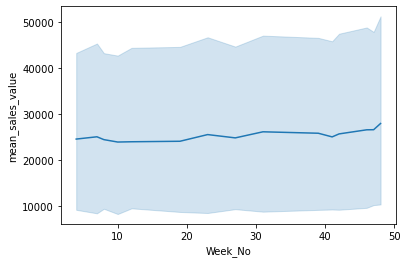

In [109]:
df_sales_theme_430 = df_search_sales_sm_groupby.loc[df_search_sales_sm_groupby["CLAIM_ID"] == 430]
df_sales_theme_430
sns.lineplot(x="Week_No",y="mean_sales_value",data=df_sales_theme_430)

#### Analysis of Theme ID 120 weekly in 2016

<AxesSubplot:xlabel='Week_No', ylabel='mean_sales_value'>

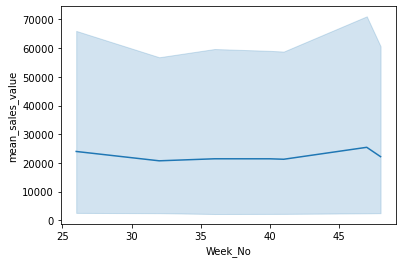

In [110]:
df_sales_theme_120 = df_search_sales_sm_groupby.loc[df_search_sales_sm_groupby["CLAIM_ID"] == 120]
df_sales_theme_120
sns.lineplot(x="Week_No",y="mean_sales_value",data=df_sales_theme_120)

#### Analysis of Theme ID 227 weekly in 2016

<AxesSubplot:xlabel='Week_No', ylabel='mean_sales_value'>

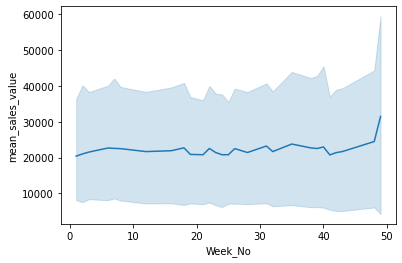

In [111]:
df_sales_theme_227 = df_search_sales_sm_groupby.loc[df_search_sales_sm_groupby["CLAIM_ID"] == 227]
df_sales_theme_227
sns.lineplot(x="Week_No",y="mean_sales_value",data=df_sales_theme_227)

#### Analysis of Theme ID 187 weekly in 2016

<AxesSubplot:xlabel='Week_No', ylabel='mean_sales_value'>

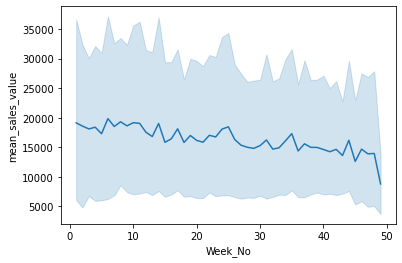

In [112]:
df_sales_theme_187 = df_search_sales_sm_groupby.loc[df_search_sales_sm_groupby["CLAIM_ID"] == 187]
df_sales_theme_187
sns.lineplot(x="Week_No",y="mean_sales_value",data=df_sales_theme_187)

#### Analysis of Theme ID 438 weekly in 2016

<AxesSubplot:xlabel='Week_No', ylabel='mean_sales_value'>

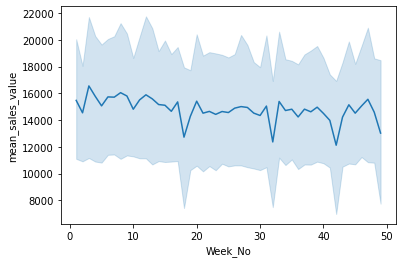

In [113]:
df_sales_theme_438 = df_search_sales_sm_groupby.loc[df_search_sales_sm_groupby["CLAIM_ID"] == 438]
df_sales_theme_438
sns.lineplot(x="Week_No",y="mean_sales_value",data=df_sales_theme_438)

In [114]:
# Create Columns 'Competitor_B_Share(%)', 'Competitor_D_Share(%)', 'Competitor_F_Share(%)',
# 'Competitor_H_Share(%)','Competitor_Others_Share(%)' and 'Competitor_Private_Label_Share(%)'
# that will have the Market shares for each competitor individually and are initialized to 0

df_search_sales_sm_groupby["Competitor_B_Share(%)"] = 0
df_search_sales_sm_groupby["Competitor_D_Share(%)"] = 0
df_search_sales_sm_groupby["Competitor_F_Share(%)"] = 0
df_search_sales_sm_groupby["Competitor_H_Share(%)"] = 0
df_search_sales_sm_groupby["Competitor_Others_Share(%)"] = 0
df_search_sales_sm_groupby["Competitor_Private_Label_Share(%)"] = 0
df_search_sales_sm_groupby.head()

CLAIM_ID  Week_No Vendor  Avg_Total_Posts  Avg_Search_Volume  \
0         8        1      A            135.0             6867.0   
1         8        1      B            135.0             6867.0   
2         8        1      D            135.0             6867.0   
3         8        1      F            135.0             6867.0   
4         8        1      H            135.0             6867.0   

   mean_sales_value  Competitor_B_Share(%)  Competitor_D_Share(%)  \
0       8901.923845                      0                      0   
1       6246.548398                      0                      0   
2      13571.273045                      0                      0   
3      16253.986516                      0                      0   
4       4267.588289                      0                      0   

   Competitor_F_Share(%)  Competitor_H_Share(%)  Competitor_Others_Share(%)  \
0                      0                      0                           0   
1                      0                      0                           0   
2                      0                      0                           0   
3                      0                      0                           0   
4                      0                      0                           0   

   Competitor_Private_Label_Share(%)  
0                                  0  
1                                  0  
2                                  0  
3                                  0  
4                                  0

#### Prepare dataset for the Theme 430

In [115]:
# Get the records for the Theme ID 430
df_search_sales_sm_430 = df_search_sales_sm_groupby.loc[
    df_search_sales_sm_groupby[
        "CLAIM_ID"
    ] 
    ==
    430
]

# Group the dataset 'df_search_sales_sm_430' with 'Week_No' and 'Vendor' columns 
# and calculate the average 'mean_sales_value' for each vendor in every week for
# the Theme ID 430
df_search_sales_sm_430_groupby = df_search_sales_sm_430.groupby(
    [
        "Week_No",
        "Vendor"
    ]
)[
    "mean_sales_value"
].mean().reset_index()


df_search_sales_sm_430_groupby.head()

Week_No Vendor  mean_sales_value
0        4      A      73591.237627
1        4      B      14655.824105
2        4      D      47176.310000
3        4      F      15863.958750
4        4      H      12994.645833

#### Calculate each Competitor's share for each week for the Theme 430

In [116]:
# Get the list of weeks under which the products of Theme ID 430 are sold
lst_search_sales_sm_430_Weeks = list(df_search_sales_sm_430_groupby["Week_No"].unique())



for i in lst_search_sales_sm_430_Weeks:
    
#     print("Week No. =", i)

    # Get the sales value of all the vendors in the given week
    
    sales_value_A = df_search_sales_sm_430.loc[(df_search_sales_sm_430["Week_No"] == i)&(df_search_sales_sm_430["Vendor"] == 'A')]["mean_sales_value"]
    sales_value_B = df_search_sales_sm_430.loc[(df_search_sales_sm_430["Week_No"] == i)&(df_search_sales_sm_430["Vendor"] == 'B')]["mean_sales_value"]
    sales_value_D = df_search_sales_sm_430.loc[(df_search_sales_sm_430["Week_No"] == i)&(df_search_sales_sm_430["Vendor"] == 'D')]["mean_sales_value"]    
    sales_value_F = df_search_sales_sm_430.loc[(df_search_sales_sm_430["Week_No"] == i)&(df_search_sales_sm_430["Vendor"] == 'F')]["mean_sales_value"]
    sales_value_H = df_search_sales_sm_430.loc[(df_search_sales_sm_430["Week_No"] == i)&(df_search_sales_sm_430["Vendor"] == 'H')]["mean_sales_value"]
    sales_value_Others = df_search_sales_sm_430.loc[(df_search_sales_sm_430["Week_No"] == i)&(df_search_sales_sm_430["Vendor"] =='Others')]["mean_sales_value"]
    sales_value_Private_Label = df_search_sales_sm_430.loc[(df_search_sales_sm_430["Week_No"]==i)&(df_search_sales_sm_430["Vendor"]=='Private Label')]["mean_sales_value"]

#     print("sales_value_A =",sales_value_A)
#     print("sales_value_B =",sales_value_B)
#     print("sales_value_D =",sales_value_D)
#     print("sales_value_F =",sales_value_F)
#     print("sales_value_H =",sales_value_H)
#     print("sales_value_Others =",sales_value_Others)
#     print("sales_value_Private_Label",sales_value_Private_Label)
    
    # Calculate the Market Share of Competitor B for the given week
    
    Share_B = round((sales_value_B.values[0]/(
    sales_value_A.values[0]+sales_value_B.values[0]+sales_value_D.values[0]+
    sales_value_F.values[0]+sales_value_H.values[0]+sales_value_Others.values[0]+
        sales_value_Private_Label.values[0]))*100,2)
    
    df_search_sales_sm_430.loc[df_search_sales_sm_430["Week_No"] == i
                                   , "Competitor_B_Share(%)"] = Share_B
    
    
    # Calculate the Market Share of Competitor D for the given week
    
    Share_D = round((sales_value_D.values[0]/(
    sales_value_A.values[0]+sales_value_B.values[0]+sales_value_D.values[0]+
    sales_value_F.values[0]+sales_value_H.values[0]+sales_value_Others.values[0]+
        sales_value_Private_Label.values[0]))*100,2)
    
    
    df_search_sales_sm_430.loc[df_search_sales_sm_430["Week_No"] == i
                                   , "Competitor_D_Share(%)"] = Share_D
    
    
    
    # Calculate the Market Share of Competitor F for the given week
    
    Share_F = round((sales_value_F.values[0]/(
    sales_value_A.values[0]+sales_value_B.values[0]+sales_value_D.values[0]+
    sales_value_F.values[0]+sales_value_H.values[0]+sales_value_Others.values[0]+
        sales_value_Private_Label.values[0]))*100,2)
    
    df_search_sales_sm_430.loc[df_search_sales_sm_430["Week_No"] == i
                                   , "Competitor_F_Share(%)"] = Share_F
    
    
    
    # Calculate the Market Share of Competitor H for the given week
    
    Share_H = round((sales_value_H.values[0]/(
    sales_value_A.values[0]+sales_value_B.values[0]+sales_value_D.values[0]+
    sales_value_F.values[0]+sales_value_H.values[0]+sales_value_Others.values[0]+
        sales_value_Private_Label.values[0]))*100,2)
    
    
    df_search_sales_sm_430.loc[df_search_sales_sm_430["Week_No"] == i
                                   , "Competitor_H_Share(%)"] = Share_H
    
    
    # Calculate the Market Share of Competitor 'Others' for the given week
    
    Share_Others = round((sales_value_Others.values[0]/(
    sales_value_A.values[0]+sales_value_B.values[0]+sales_value_D.values[0]+
    sales_value_F.values[0]+sales_value_H.values[0]+sales_value_Others.values[0]+
        sales_value_Private_Label.values[0]))*100,2)
    
    
    df_search_sales_sm_430.loc[df_search_sales_sm_430["Week_No"] == i
                                   , "Competitor_Others_Share(%)"] = Share_Others
    
    
    # Calculate the Market Share of Competitor 'Private Label' for the given week
    
    Share_Private_Label = round((sales_value_Private_Label.values[0]/(
    sales_value_A.values[0]+sales_value_B.values[0]+sales_value_D.values[0]+
    sales_value_F.values[0]+sales_value_H.values[0]+sales_value_Others.values[0]+
        sales_value_Private_Label.values[0]))*100,2)
    
    df_search_sales_sm_430.loc[df_search_sales_sm_430["Week_No"] == i
                                   , "Competitor_Private_Label_Share(%)"] = Share_Private_Label
    

df_search_sales_sm_430 = df_search_sales_sm_430.loc[df_search_sales_sm_430["Vendor"] == 'A']
df_search_sales_sm_430 = df_search_sales_sm_430.drop("Vendor", axis=1)
df_search_sales_sm_430.head()
# lst_market_share = []

# sales_value_A = df_search_sales_sm_430.loc[(df_search_sales_sm_430["Week_Num"] == 4) & (df_search_sales_sm_430["Vendor"] == 'A')]["mean_sales_value"]
# sales_value_B = df_search_sales_sm_430.loc[(df_search_sales_sm_430["Week_Num"] == 4) & (df_search_sales_sm_430["Vendor"] == 'B')]["mean_sales_value"]
# sales_value_D = df_search_sales_sm_430.loc[(df_search_sales_sm_430["Week_Num"] == 4) & (df_search_sales_sm_430["Vendor"] == 'D')]["mean_sales_value"]
# sales_value_F = df_search_sales_sm_430.loc[(df_search_sales_sm_430["Week_Num"] == 4) & (df_search_sales_sm_430["Vendor"] == 'F')]["mean_sales_value"]
# sales_value_H = df_search_sales_sm_430.loc[(df_search_sales_sm_430["Week_Num"] == 4) & (df_search_sales_sm_430["Vendor"] == 'H')]["mean_sales_value"]
# sales_value_Others = df_search_sales_sm_430.loc[(df_search_sales_sm_430["Week_Num"] == 4) & (df_search_sales_sm_430["Vendor"] == 'Others')]["mean_sales_value"]
# sales_value_Private_Label = df_search_sales_sm_430.loc[(df_search_sales_sm_430["Week_Num"] == 4) & (df_search_sales_sm_430["Vendor"] == 'Private Label')]["mean_sales_value"]

  

# print(Share_B)

C:\Users\prateek.aneja\Anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


CLAIM_ID  Week_No  Avg_Total_Posts  Avg_Search_Volume  mean_sales_value  \
2347       430        4             19.0             1935.0      73591.237627   
2354       430        7              3.0             2257.0      78836.052807   
2361       430        8              1.0              323.0      77661.118983   
2368       430       10              1.0             1708.0      72886.744500   
2375       430       12             13.0              323.0      74771.401356   

      Competitor_B_Share(%)  Competitor_D_Share(%)  Competitor_F_Share(%)  \
2347                   8.51                  27.39                   9.21   
2354                   7.71                  26.26                   8.85   
2361                   8.09                  25.12                   9.12   
2368                   8.50                  26.83                   8.78   
2375                   8.68                  24.81                   9.21   

      Competitor_H_Share(%)  Competitor_Others_Share(%)  \
2347                   7.54                        2.74   
2354                   7.52                        3.10   
2361                   7.41                        3.18   
2368                   7.58                        3.21   
2375                   7.98                        3.12   

      Competitor_Private_Label_Share(%)  
2347                               1.89  
2354                               1.71  
2361                               1.78  
2368                               1.64  
2375                               1.73

In [117]:
# Calculate the Average Competitor Share
df_search_sales_sm_430["Mean_Competitor_Share(%)"] = round(
    (df_search_sales_sm_430["Competitor_B_Share(%)"]+df_search_sales_sm_430["Competitor_D_Share(%)"] + 
     df_search_sales_sm_430["Competitor_F_Share(%)"] + df_search_sales_sm_430["Competitor_H_Share(%)"] + 
     df_search_sales_sm_430["Competitor_Others_Share(%)"] + 
     df_search_sales_sm_430["Competitor_Private_Label_Share(%)"])/6,2)


df_search_sales_sm_430

CLAIM_ID  Week_No  Avg_Total_Posts  Avg_Search_Volume  mean_sales_value  \
2347       430        4             19.0             1935.0      73591.237627   
2354       430        7              3.0             2257.0      78836.052807   
2361       430        8              1.0              323.0      77661.118983   
2368       430       10              1.0             1708.0      72886.744500   
2375       430       12             13.0              323.0      74771.401356   
2382       430       19              2.0              645.0      76184.446250   
2389       430       23              4.0              921.0      77084.060727   
2396       430       27              3.0              968.0      78220.710377   
2403       430       31              3.0              645.0      81924.375818   
2410       430       39              1.0              968.0      77601.396379   
2417       430       41              9.0              968.0      78618.066727   
2424       430       42             42.0              968.0      81703.666415   
2431       430       46              3.0              307.0      82224.684909   
2438       430       47              3.0              307.0      80754.561579   
2445       430       48              4.0              968.0      86854.813654   

      Competitor_B_Share(%)  Competitor_D_Share(%)  Competitor_F_Share(%)  \
2347                   8.51                  27.39                   9.21   
2354                   7.71                  26.26                   8.85   
2361                   8.09                  25.12                   9.12   
2368                   8.50                  26.83                   8.78   
2375                   8.68                  24.81                   9.21   
2382                   7.91                  25.80                   8.99   
2389                   7.97                  29.20                   8.21   
2396                   8.62                  26.07                   8.67   
2403                   8.22                  26.57                   9.27   
2410                   9.09                  26.76                   9.16   
2417                   9.15                  26.15                   8.43   
2424                   8.75                  26.02                   8.09   
2431                   9.30                  26.16                   8.83   
2438                   9.81                  26.17                   8.56   
2445                   9.15                  26.57                   8.50   

      Competitor_H_Share(%)  Competitor_Others_Share(%)  \
2347                   7.54                        2.74   
2354                   7.52                        3.10   
2361                   7.41                        3.18   
2368                   7.58                        3.21   
2375                   7.98                        3.12   
2382                   7.89                        2.62   
2389                   7.29                        2.77   
2396                   7.27                        2.90   
2403                   7.07                        2.55   
2410                   7.73                        2.69   
2417                   7.39                        2.53   
2424                   7.56                        2.66   
2431                   7.37                        2.64   
2438                   7.58                        2.78   
2445                   7.31                        2.64   

      Competitor_Private_Label_Share(%)  Mean_Competitor_Share(%)  
2347                               1.89                      9.55  
2354                               1.71                      9.19  
2361                               1.78                      9.12  
2368                               1.64                      9.42  
2375                               1.73                      9.25  
2382                               1.69                      9.15  
2389                               1.51                

In [118]:
# Remove individual Competitor Shares
df_search_sales_sm_430 = df_search_sales_sm_430.drop(["Competitor_B_Share(%)","Competitor_D_Share(%)",
                                                      "Competitor_F_Share(%)","Competitor_H_Share(%)",
                                                     "Competitor_Others_Share(%)","Competitor_Private_Label_Share(%)"],
                                                    axis=1)

df_search_sales_sm_430

CLAIM_ID  Week_No  Avg_Total_Posts  Avg_Search_Volume  mean_sales_value  \
2347       430        4             19.0             1935.0      73591.237627   
2354       430        7              3.0             2257.0      78836.052807   
2361       430        8              1.0              323.0      77661.118983   
2368       430       10              1.0             1708.0      72886.744500   
2375       430       12             13.0              323.0      74771.401356   
2382       430       19              2.0              645.0      76184.446250   
2389       430       23              4.0              921.0      77084.060727   
2396       430       27              3.0              968.0      78220.710377   
2403       430       31              3.0              645.0      81924.375818   
2410       430       39              1.0              968.0      77601.396379   
2417       430       41              9.0              968.0      78618.066727   
2424       430       42             42.0              968.0      81703.666415   
2431       430       46              3.0              307.0      82224.684909   
2438       430       47              3.0              307.0      80754.561579   
2445       430       48              4.0              968.0      86854.813654   

      Mean_Competitor_Share(%)  
2347                      9.55  
2354                      9.19  
2361                      9.12  
2368                      9.42  
2375                      9.25  
2382                      9.15  
2389                      9.49  
2396                      9.18  
2403                      9.22  
2410                      9.53  
2417                      9.20  
2424                      9.11  
2431                      9.31  
2438                      9.45  
2445                      9.28

#### Prepare Dataset for Theme 120

In [119]:
# Get the records for the Theme ID 120
df_search_sales_sm_120 = df_search_sales_sm_groupby.loc[
    df_search_sales_sm_groupby[
        "CLAIM_ID"
    ] 
    ==
    120
]

# Group the dataset 'df_search_sales_sm_120' with 'Week_No' and 'Vendor' columns 
# and calculate the average 'mean_sales_value' for each vendor in every week for
# the Theme ID 120
df_search_sales_sm_120_groupby = df_search_sales_sm_120.groupby(
    [
        "Week_No",
        "Vendor"
    ]
)[
    "mean_sales_value"
].mean().reset_index()

df_search_sales_sm_120_groupby.head()

Week_No  Vendor  mean_sales_value
0       26       A       3443.553333
1       26       F      66004.428571
2       26  Others       2629.753912
3       32       A       2938.110000
4       32       F      56834.954286

#### Calculate each Competitor's share for each week for the Theme ID 120

In [120]:
# Get the list of weeks under which the products of Theme ID 120 are sold
lst_search_sales_sm_120_Weeks = list(df_search_sales_sm_120_groupby["Week_No"].unique())

for i in lst_search_sales_sm_120_Weeks:
    
#     print("Day No. =", i)
    
    # Get the sales value of all the vendors in the given week
    
    sales_value_A = df_search_sales_sm_120.loc[(df_search_sales_sm_120["Week_No"] == i)&(df_search_sales_sm_120["Vendor"] == 'A')]["mean_sales_value"]
    sales_value_B = df_search_sales_sm_120.loc[(df_search_sales_sm_120["Week_No"] == i)&(df_search_sales_sm_120["Vendor"] == 'B')]["mean_sales_value"]
    sales_value_D = df_search_sales_sm_120.loc[(df_search_sales_sm_120["Week_No"] == i)&(df_search_sales_sm_120["Vendor"] == 'D')]["mean_sales_value"]    
    sales_value_F = df_search_sales_sm_120.loc[(df_search_sales_sm_120["Week_No"] == i)&(df_search_sales_sm_120["Vendor"] == 'F')]["mean_sales_value"]
    sales_value_H = df_search_sales_sm_120.loc[(df_search_sales_sm_120["Week_No"] == i)&(df_search_sales_sm_120["Vendor"] == 'H')]["mean_sales_value"]
    sales_value_Others = df_search_sales_sm_120.loc[(df_search_sales_sm_120["Week_No"] == i)&(df_search_sales_sm_120["Vendor"] =='Others')]["mean_sales_value"]
    sales_value_Private_Label = df_search_sales_sm_120.loc[(df_search_sales_sm_120["Week_No"]==i)&(df_search_sales_sm_120["Vendor"]=='Private Label')]["mean_sales_value"]

    # If sales_value for Competitor B is NaN for given week, 
    # then assign 0 to the Competitor B sales_value 
    if sales_value_B.size == 0:
        sales_value_B = pd.Series(list(np.zeros(1)))
        
    # If sales_value for Competitor D is NaN for given week, 
    # then assign 0 to the Competitor D sales_value
    if sales_value_D.size == 0:
        sales_value_D = pd.Series(list(np.zeros(1)))
        
    # If sales_value for Competitor F is NaN for given week, 
    # then assign 0 to the Competitor F sales_value
    if sales_value_F.size == 0:
        sales_value_F = pd.Series(list(np.zeros(1)))
    
         
    # If sales_value for Competitor H is NaN for given week, 
    # then assign 0 to the Competitor H sales_value
    if sales_value_H.size == 0:
        sales_value_H = pd.Series(list(np.zeros(1)))
        
         
    # If sales_value for Competitor 'Others' is NaN for given week, 
    # then assign 0 to the Competitor 'Others' sales_value
    if sales_value_Others.size == 0:
        sales_value_Others = pd.Series(list(np.zeros(1)))
        
         
    # If sales_value for Competitor 'Private Label' is NaN for given week, 
    # then assign 0 to the Competitor 'Private Label' sales_value
    if sales_value_Private_Label.size == 0:
        sales_value_Private_Label = pd.Series(list(np.zeros(1)))
    
    
    # Calculate the Market Share of Competitor B for the given week
    if sales_value_B.size != 0:
        Share_B = round((sales_value_B.values[0]/(
        sales_value_A.values[0]+sales_value_B.values[0]+sales_value_D.values[0]+
        sales_value_F.values[0]+sales_value_H.values[0]+sales_value_Others.values[0]+
        sales_value_Private_Label.values[0]))*100,2)
    
        df_search_sales_sm_120.loc[df_search_sales_sm_120["Week_No"] == i
                                   , "Competitor_B_Share(%)"] = Share_B
        
    else:
        sales_value_B = np.zeros(df_search_sales_sm_120.shape[0])
    
    
    # Calculate the Market Share of Competitor D for the given week
    if sales_value_D.size != 0:
        Share_D = round((sales_value_D.values[0]/(
        sales_value_A.values[0]+sales_value_B.values[0]+sales_value_D.values[0]+
        sales_value_F.values[0]+sales_value_H.values[0]+sales_value_Others.values[0]+
        sales_value_Private_Label.values[0]))*100,2)
    
    
        df_search_sales_sm_120.loc[df_search_sales_sm_120["Week_No"] == i
                                   , "Competitor_D_Share(%)"] = Share_D
        
    else:
        sales_value_D = np.zeros(df_search_sales_sm_120.shape[0])
    
    
    # Calculate the Market Share of Competitor F for the given week
    if sales_value_F.size != 0:
        Share_F = round((sales_value_F.values[0]/(
        sales_value_A.values[0]+sales_value_B.values[0]+sales_value_D.values[0]+
        sales_value_F.values[0]+sales_value_H.values[0]+sales_value_Others.values[0]+
        sales_value_Private_Label.values[0]))*100,2)
    
        df_search_sales_sm_120.loc[df_search_sales_sm_120["Week_No"] == i
                                   , "Competitor_F_Share(%)"] = Share_F
        
    else:
        sales_value_F = np.zeros(df_search_sales_sm_120.shape[0])
    
    
    
    # Calculate the Market Share of Competitor H for the given week
    if sales_value_H.size != 0:
        Share_H = round((sales_value_H.values[0]/(
        sales_value_A.values[0]+sales_value_B.values[0]+sales_value_D.values[0]+
        sales_value_F.values[0]+sales_value_H.values[0]+sales_value_Others.values[0]+
        sales_value_Private_Label.values[0]))*100,2)
    
    
        df_search_sales_sm_120.loc[df_search_sales_sm_120["Week_No"] == i
                                   , "Competitor_H_Share(%)"] = Share_H
        
    else:
        sales_value_H = np.zeros(df_search_sales_sm_120.shape[0])
    
    
    
    # Calculate the Market Share of Competitor 'Others' for the given week
    if sales_value_Others.size != 0:
        Share_Others = round((sales_value_Others.values[0]/(
        sales_value_A.values[0]+sales_value_B.values[0]+sales_value_D.values[0]+
        sales_value_F.values[0]+sales_value_H.values[0]+sales_value_Others.values[0]+
        sales_value_Private_Label.values[0]))*100,2)
    
    
        df_search_sales_sm_120.loc[df_search_sales_sm_120["Week_No"] == i
                                   , "Competitor_Others_Share(%)"] = Share_Others
        
    else:
        sales_value_Others = np.zeros(df_search_sales_sm_120.shape[0])
    
    
    
    # Calculate the Market Share of Competitor 'Private Label' for the given week
    if sales_value_Private_Label.size != 0:
        Share_Private_Label = round((sales_value_Private_Label.values[0]/(
        sales_value_A.values[0]+sales_value_B.values[0]+sales_value_D.values[0]+
        sales_value_F.values[0]+sales_value_H.values[0]+sales_value_Others.values[0]+
        sales_value_Private_Label.values[0]))*100,2)
    
        df_search_sales_sm_120.loc[df_search_sales_sm_120["Week_No"] == i
                                   , "Competitor_Others_Share(%)"] = Share_Private_Label
        
    else:
        sales_value_Private_Label = np.zeros(df_search_sales_sm_120.shape[0])
    

df_search_sales_sm_120 = df_search_sales_sm_120.loc[df_search_sales_sm_120["Vendor"] == 'A']
df_search_sales_sm_120 = df_search_sales_sm_120.drop("Vendor", axis=1)
# df_search_sales_sm_120.head()

C:\Users\prateek.aneja\Anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [121]:
# Calculate the Average Competitor Share
df_search_sales_sm_120["Mean_Competitor_Share(%)"] = round(
    (df_search_sales_sm_120["Competitor_B_Share(%)"]+df_search_sales_sm_120["Competitor_D_Share(%)"] + 
     df_search_sales_sm_120["Competitor_F_Share(%)"] + df_search_sales_sm_120["Competitor_H_Share(%)"] + 
     df_search_sales_sm_120["Competitor_Others_Share(%)"] + 
     df_search_sales_sm_120["Competitor_Private_Label_Share(%)"])/6,2)


df_search_sales_sm_120

CLAIM_ID  Week_No  Avg_Total_Posts  Avg_Search_Volume  mean_sales_value  \
873       120       26              4.0              482.0       3443.553333   
876       120       32              2.0             1205.0       2938.110000   
879       120       36              0.0              482.0       2246.200000   
882       120       40             12.0              482.0       3076.332000   
885       120       41              7.0              964.0       2842.466000   
888       120       47             11.0             1377.0       2850.466000   
891       120       48             11.0              723.0       3452.598000   

     Competitor_B_Share(%)  Competitor_D_Share(%)  Competitor_F_Share(%)  \
873                      0                      0                  91.57   
876                      0                      0                  91.21   
879                      0                      0                  92.66   
882                      0                      0                  91.69   
885                      0                      0                  91.98   
888                      0                      0                  93.01   
891                      0                      0                  91.00   

     Competitor_H_Share(%)  Competitor_Others_Share(%)  \
873                      0                         0.0   
876                      0                         0.0   
879                      0                         0.0   
882                      0                         0.0   
885                      0                         0.0   
888                      0                         0.0   
891                      0                         0.0   

     Competitor_Private_Label_Share(%)  Mean_Competitor_Share(%)  
873                                  0                     15.26  
876                                  0                     15.20  
879                                  0                     15.44  
882                                  0                     15.28  
885                                  0                     15.33  
888                                  0                     15.50  
891                                  0                     15.17

In [122]:
# Remove individual Competitor Shares
df_search_sales_sm_120 = df_search_sales_sm_120.drop(["Competitor_B_Share(%)","Competitor_D_Share(%)",
                                                      "Competitor_F_Share(%)","Competitor_H_Share(%)",
                                                     "Competitor_Others_Share(%)","Competitor_Private_Label_Share(%)"],
                                                    axis=1)

df_search_sales_sm_120

CLAIM_ID  Week_No  Avg_Total_Posts  Avg_Search_Volume  mean_sales_value  \
873       120       26              4.0              482.0       3443.553333   
876       120       32              2.0             1205.0       2938.110000   
879       120       36              0.0              482.0       2246.200000   
882       120       40             12.0              482.0       3076.332000   
885       120       41              7.0              964.0       2842.466000   
888       120       47             11.0             1377.0       2850.466000   
891       120       48             11.0              723.0       3452.598000   

     Mean_Competitor_Share(%)  
873                     15.26  
876                     15.20  
879                     15.44  
882                     15.28  
885                     15.33  
888                     15.50  
891                     15.17

#### Prepare Dataset for the Theme 227

In [123]:
# Get the records for the Theme ID 227
df_search_sales_sm_227 = df_search_sales_sm_groupby.loc[
    df_search_sales_sm_groupby[
        "CLAIM_ID"
    ] 
    ==
    227
]

# Group the dataset 'df_search_sales_sm_227' with 'Week_No' and 'Vendor' columns 
# and calculate the average 'mean_sales_value' for each vendor in every week for
# the Theme ID 227
df_search_sales_sm_227_groupby = df_search_sales_sm_227.groupby(
    [
        "Week_No",
        "Vendor"
    ]
)[
    "mean_sales_value"
].mean().reset_index()

df_search_sales_sm_227_groupby

Week_No  Vendor  mean_sales_value
0          1       A      67519.053971
1          1       B      10250.187925
2          1       D      20250.064615
3          1       F       2566.488214
4          1       H      11908.129444
..       ...     ...               ...
190       49       B       4987.880889
191       49       D      87397.095714
192       49       F       1982.269032
193       49       H       5493.846000
194       49  Others       5795.468542

[195 rows x 3 columns]

#### Calculate each Competitor's share for each week for the Theme ID 227

In [124]:
# Get the list of weeks under which the products of Theme ID 120 are sold
lst_search_sales_sm_227_Weeks = list(df_search_sales_sm_227_groupby["Week_No"].unique())

for i in lst_search_sales_sm_227_Weeks:
    
#     print("Day No. =", i)
    # Get the sales value of all the vendors in the given week
    
    sales_value_A = df_search_sales_sm_227.loc[(df_search_sales_sm_227["Week_No"] == i)&(df_search_sales_sm_227["Vendor"] == 'A')]["mean_sales_value"]
    sales_value_B = df_search_sales_sm_227.loc[(df_search_sales_sm_227["Week_No"] == i)&(df_search_sales_sm_227["Vendor"] == 'B')]["mean_sales_value"]
    sales_value_D = df_search_sales_sm_227.loc[(df_search_sales_sm_227["Week_No"] == i)&(df_search_sales_sm_227["Vendor"] == 'D')]["mean_sales_value"]    
    sales_value_F = df_search_sales_sm_227.loc[(df_search_sales_sm_227["Week_No"] == i)&(df_search_sales_sm_227["Vendor"] == 'F')]["mean_sales_value"]
    sales_value_H = df_search_sales_sm_227.loc[(df_search_sales_sm_227["Week_No"] == i)&(df_search_sales_sm_227["Vendor"] == 'H')]["mean_sales_value"]
    sales_value_Others = df_search_sales_sm_227.loc[(df_search_sales_sm_227["Week_No"] == i)&(df_search_sales_sm_227["Vendor"] =='Others')]["mean_sales_value"]
    sales_value_Private_Label = df_search_sales_sm_227.loc[(df_search_sales_sm_227["Week_No"]==i)&(df_search_sales_sm_227["Vendor"]=='Private Label')]["mean_sales_value"]

     # If sales_value for Competitor B is NaN for given week, 
    # then assign 0 to the Competitor B sales_value
    if sales_value_B.size == 0:
        sales_value_B = pd.Series(list(np.zeros(1)))
        
     # If sales_value for Competitor D is NaN for given week, 
    # then assign 0 to the Competitor D sales_value
    if sales_value_D.size == 0:
        sales_value_D = pd.Series(list(np.zeros(1)))
        
     # If sales_value for Competitor F is NaN for given week, 
    # then assign 0 to the Competitor F sales_value
    if sales_value_F.size == 0:
        sales_value_F = pd.Series(list(np.zeros(1)))
        
     # If sales_value for Competitor H is NaN for given week, 
    # then assign 0 to the Competitor H sales_value
    if sales_value_H.size == 0:
        sales_value_H = pd.Series(list(np.zeros(1)))
        
     # If sales_value for Competitor 'Others' is NaN for given week, 
    # then assign 0 to the Competitor 'Others' sales_value
    if sales_value_Others.size == 0:
        sales_value_Others = pd.Series(list(np.zeros(1)))
        
     # If sales_value for Competitor 'Private Label' is NaN for given week, 
    # then assign 0 to the Competitor 'Private Label' sales_value
    if sales_value_Private_Label.size == 0:
        sales_value_Private_Label = pd.Series(list(np.zeros(1)))
    
    
    # Calculate the Market Share of Competitor B for the given week
    if sales_value_B.size != 0:
        Share_B = round((sales_value_B.values[0]/(
        sales_value_A.values[0]+sales_value_B.values[0]+sales_value_D.values[0]+
        sales_value_F.values[0]+sales_value_H.values[0]+sales_value_Others.values[0]+
        sales_value_Private_Label.values[0]))*100,2)
    
        df_search_sales_sm_227.loc[df_search_sales_sm_227["Week_No"] == i
                                   , "Competitor_B_Share(%)"] = Share_B
        
    else:
        sales_value_B = np.zeros(df_search_sales_sm_227.shape[0])
    
    
    # Calculate the Market Share of Competitor D for the given week
    if sales_value_D.size != 0:
        Share_D = round((sales_value_D.values[0]/(
        sales_value_A.values[0]+sales_value_B.values[0]+sales_value_D.values[0]+
        sales_value_F.values[0]+sales_value_H.values[0]+sales_value_Others.values[0]+
        sales_value_Private_Label.values[0]))*100,2)
    
    
        df_search_sales_sm_227.loc[df_search_sales_sm_227["Week_No"] == i
                                   , "Competitor_D_Share(%)"] = Share_D
        
    else:
        sales_value_D = np.zeros(df_search_sales_sm_227.shape[0])
    
    
    # Calculate the Market Share of Competitor F for the given week
    if sales_value_F.size != 0:
        Share_F = round((sales_value_F.values[0]/(
        sales_value_A.values[0]+sales_value_B.values[0]+sales_value_D.values[0]+
        sales_value_F.values[0]+sales_value_H.values[0]+sales_value_Others.values[0]+
        sales_value_Private_Label.values[0]))*100,2)
    
        df_search_sales_sm_227.loc[df_search_sales_sm_227["Week_No"] == i
                                   , "Competitor_F_Share(%)"] = Share_F
        
    else:
        sales_value_F = np.zeros(df_search_sales_sm_227.shape[0])
    
    
    # Calculate the Market Share of Competitor H for the given week
    if sales_value_H.size != 0:
        Share_H = round((sales_value_H.values[0]/(
        sales_value_A.values[0]+sales_value_B.values[0]+sales_value_D.values[0]+
        sales_value_F.values[0]+sales_value_H.values[0]+sales_value_Others.values[0]+
        sales_value_Private_Label.values[0]))*100,2)
    
    
        df_search_sales_sm_227.loc[df_search_sales_sm_227["Week_No"] == i
                                   , "Competitor_H_Share(%)"] = Share_H
        
    else:
        sales_value_H = np.zeros(df_search_sales_sm_227.shape[0])
    
    
    # Calculate the Market Share of Competitor 'Others' for the given week
    if sales_value_Others.size != 0:
        Share_Others = round((sales_value_Others.values[0]/(
        sales_value_A.values[0]+sales_value_B.values[0]+sales_value_D.values[0]+
        sales_value_F.values[0]+sales_value_H.values[0]+sales_value_Others.values[0]+
        sales_value_Private_Label.values[0]))*100,2)
    
    
        df_search_sales_sm_227.loc[df_search_sales_sm_227["Week_No"] == i
                                   , "Competitor_Others_Share(%)"] = Share_Others
        
    else:
        sales_value_Others = np.zeros(df_search_sales_sm_227.shape[0])
    
    
    # Calculate the Market Share of Competitor 'Private Label' for the given week
    if sales_value_Private_Label.size != 0:
        Share_Private_Label = round((sales_value_Private_Label.values[0]/(
        sales_value_A.values[0]+sales_value_B.values[0]+sales_value_D.values[0]+
        sales_value_F.values[0]+sales_value_H.values[0]+sales_value_Others.values[0]+
        sales_value_Private_Label.values[0]))*100,2)
    
        df_search_sales_sm_227.loc[df_search_sales_sm_227["Week_No"] == i
                                   , "Competitor_Private_Label_Share(%)"] = Share_Private_Label
        
    else:
        sales_value_Private_Label = np.zeros(df_search_sales_sm_227.shape[0])
    

df_search_sales_sm_227 = df_search_sales_sm_227.loc[df_search_sales_sm_227["Vendor"] == 'A']
df_search_sales_sm_227 = df_search_sales_sm_227.drop("Vendor", axis=1)
# df_search_sales_sm_120.head()

C:\Users\prateek.aneja\Anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [125]:
df_search_sales_sm_227["Mean_Competitor_Share(%)"] = round(
    (df_search_sales_sm_227["Competitor_B_Share(%)"]+df_search_sales_sm_227["Competitor_D_Share(%)"] + 
     df_search_sales_sm_227["Competitor_F_Share(%)"] + df_search_sales_sm_227["Competitor_H_Share(%)"] + 
     df_search_sales_sm_227["Competitor_Others_Share(%)"] + 
     df_search_sales_sm_227["Competitor_Private_Label_Share(%)"])/6,2)


df_search_sales_sm_227.head()

CLAIM_ID  Week_No  Avg_Total_Posts  Avg_Search_Volume  mean_sales_value  \
2061       227        1              5.0              637.0      67519.053971   
2068       227        2             15.0              637.0      70683.700333   
2075       227        3              8.0              425.0      67410.822188   
2082       227        6              7.0              850.0      65440.030923   
2089       227        7             34.0              213.0      64879.083968   

      Competitor_B_Share(%)  Competitor_D_Share(%)  Competitor_F_Share(%)  \
2061                   7.17                  14.16                   1.80   
2068                   3.87                  16.39                   1.46   
2075                   5.53                  18.35                   1.44   
2082                   4.48                  25.46                   1.22   
2089                   4.17                  27.05                   1.22   

      Competitor_H_Share(%)  Competitor_Others_Share(%)  \
2061                   8.33                        3.64   
2068                   7.65                        3.63   
2075                   9.26                        3.50   
2082                   6.91                        3.34   
2089                   6.73                        3.32   

      Competitor_Private_Label_Share(%)  Mean_Competitor_Share(%)  
2061                              17.68                      8.80  
2068                              18.98                      8.66  
2075                              17.24                      9.22  
2082                              17.38                      9.80  
2089                              16.45                      9.82

In [126]:
df_search_sales_sm_227 = df_search_sales_sm_227.drop(["Competitor_B_Share(%)","Competitor_D_Share(%)",
                                                      "Competitor_F_Share(%)","Competitor_H_Share(%)",
                                                     "Competitor_Others_Share(%)","Competitor_Private_Label_Share(%)"],
                                                    axis=1)

df_search_sales_sm_227.head()

CLAIM_ID  Week_No  Avg_Total_Posts  Avg_Search_Volume  mean_sales_value  \
2061       227        1              5.0              637.0      67519.053971   
2068       227        2             15.0              637.0      70683.700333   
2075       227        3              8.0              425.0      67410.822188   
2082       227        6              7.0              850.0      65440.030923   
2089       227        7             34.0              213.0      64879.083968   

      Mean_Competitor_Share(%)  
2061                      8.80  
2068                      8.66  
2075                      9.22  
2082                      9.80  
2089                      9.82

In [127]:
df_search_sales_sm_227.shape

(28, 6)

In [134]:
df_search_sales_sm_227 = df_search_sales_sm_227.reset_index(drop=True)
df_search_sales_sm_227.head()

CLAIM_ID  Week_No  Avg_Total_Posts  Avg_Search_Volume  mean_sales_value  \
0       227        1              5.0              637.0      67519.053971   
1       227        2             15.0              637.0      70683.700333   
2       227        3              8.0              425.0      67410.822188   
3       227        6              7.0              850.0      65440.030923   
4       227        7             34.0              213.0      64879.083968   

   Mean_Competitor_Share(%)  
0                      8.80  
1                      8.66  
2                      9.22  
3                      9.80  
4                      9.82

<AxesSubplot:>

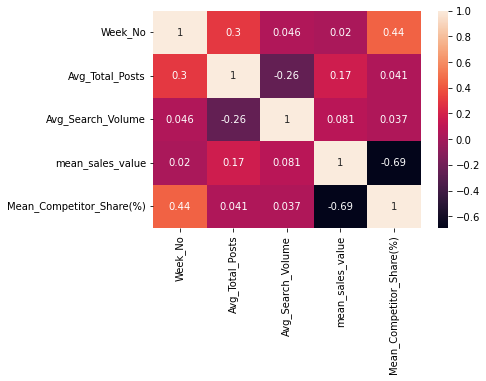

In [136]:
df_search_sales_sm_227_Numeric = df_search_sales_sm_227.drop("CLAIM_ID",axis=1)
sns.heatmap(df_search_sales_sm_227_Numeric.corr(), annot=True) 

## Data Modelling

In [138]:
# Take the independent variables in variable X
X = df_search_sales_sm_227_Numeric.drop("mean_sales_value", axis=1)

# Take the Target
y = df_search_sales_sm_227_Numeric["mean_sales_value"]

In [139]:
# Import train_test_split to split the dataset into training and testing datasets
from sklearn.model_selection import train_test_split

# Split the dataset with 70% in training dataset and 30% in testing dataset
X_train,X_test,y_train,y_test = train_test_split(X, y, train_size=0.7, random_state=100)

In [140]:
# Apply Linear Regression Model

from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression()

In [142]:
y_train_predict = lin_reg.predict(X_train)
y_train_predict

array([60217.22574752, 59905.74377768, 59451.24833182, 73995.89498604,
       71665.17167996, 73551.39574111, 63281.41842292, 59426.1710727 ,
       60396.57767947, 60635.41787839, 66351.65439395, 56206.08114436,
       59985.45524165, 61554.70259887, 63670.36140227, 60085.2291973 ,
       61709.66543141, 66610.81632687, 58111.28943155])

In [147]:
from sklearn.metrics import r2_score
r2 = round(r2_score(y_train,y_train_predict),2)
r2

0.64

In [154]:
Adj_r2 = round(1 - (1-r2) * (len(y_train)-1)/(len(y_train)-X_train.shape[1]-1),2)
Adj_r2

0.54

In [152]:
y_test_predict = lin_reg.predict(X_test)
y_test_predict

array([56917.30347434, 68677.14376238, 60116.8391426 , 61498.879659  ,
       59198.65053689, 58682.58230293, 65535.75405445, 68457.77131095,
       62127.47213989])

In [153]:
r2_test = round(r2_score(y_test,y_test_predict),2)
r2_test

0.38

In [155]:
Adj_r2 = round(1 - (1-r2_test) * (len(y_test)-1)/(len(y_test)-X_test.shape[1]-1),2)
Adj_r2

-0.24

In [156]:
from sklearn.ensemble import RandomForestRegressor

rnd_frst_reg = RandomForestRegressor()
rnd_frst_reg.fit(X_train,y_train)

RandomForestRegressor()

In [157]:
y_train_predict = rnd_frst_reg.predict(X_train)

In [160]:
r2 = round(r2_score(y_train,y_train_predict),2)
r2

0.91

In [161]:
Adj_r2 = round(1 - (1-r2) * (len(y_train)-1)/(len(y_train)-X_train.shape[1]-1),2)
Adj_r2

0.88

In [162]:
y_test_predict = rnd_frst_reg.predict(X_test)
y_test_predict

array([58329.88779287, 70303.34145982, 58342.43831216, 61306.01085617,
       62929.53404337, 59503.1600468 , 60828.16432591, 61665.18942233,
       62710.05590956])

In [163]:
r2_test = round(r2_score(y_test,y_test_predict),2)
r2_test

0.84

In [164]:
Adj_r2 = round(1 - (1-r2_test) * (len(y_test)-1)/(len(y_test)-X_test.shape[1]-1),2)
Adj_r2

0.68